# Haberman's Survival Data Set
*of patients who had undergone surgery for breast cancer between 1958 and 1970 at the University of Chicago's Billings Hospital.*<br><br>
**->Our task is to do EXPLORATORY DATA ANALYSIS on this dataset and find out what are the factors and how they affect the survival of a patient after breast cancer surgery**<br><br>
Reference: https://www.kaggle.com/gilsousa/habermans-survival-data-set

## Importing necessary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

## Loading Haberman's dataset

In [5]:
hab = pd.read_csv("haberman.csv", names = ['age','year','nodes','status'])
# column names are not provided, so explictly assigning names to columns

In [6]:
# Overview of dataset
# feature columns = age(age of patient at the time of surgery), year(year at which the surgery was done), nodes(no. of positive axillary nodes detected)
# target column = status(1 = the patient survived 5 years or longer, 2 = the patient died within 5 year) 

hab.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [8]:
# summary of dataset
print(hab.shape)
hab.describe()

(306, 4)


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**we have total 306 entries and 4 columns**

In [9]:
# checking if there are any NULL values
hab.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

**there is no NULL value**

In [10]:
hab['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**this is an unbalanced dataset as the number of survival patients are almost thrice of the number of non-survival patients**

## Visualization

### univariate plots

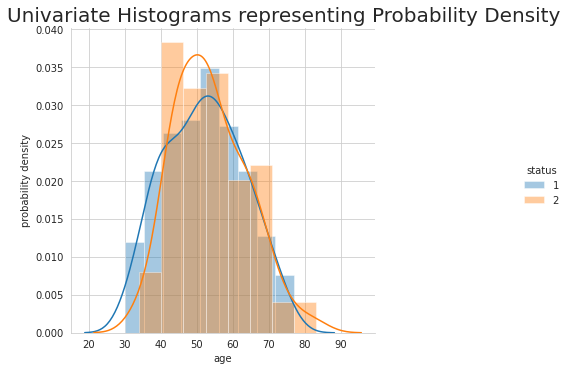

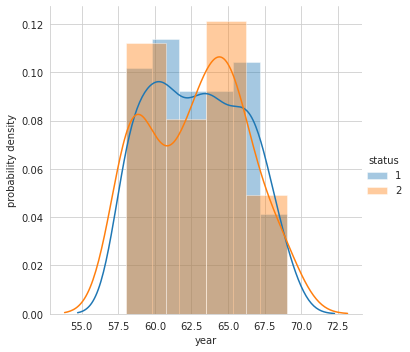

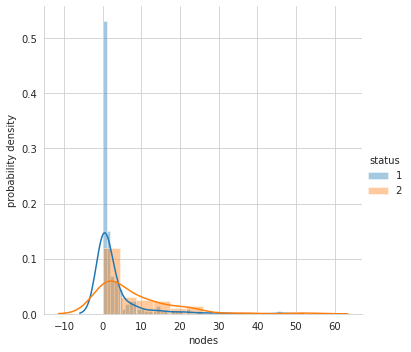

In [17]:
# PDFs(Probability Density Functions)

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.distplot,"age").add_legend()
plt.title("Univariate Histograms representing Probability Density",size=20,y=1,x=0.7)
plt.ylabel("probability density")

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.distplot,"year").add_legend()
plt.ylabel("probability density")

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.distplot,"nodes").add_legend()
plt.ylabel("probability density")

plt.show()

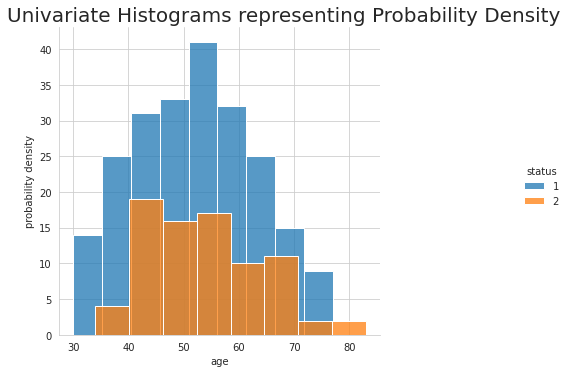

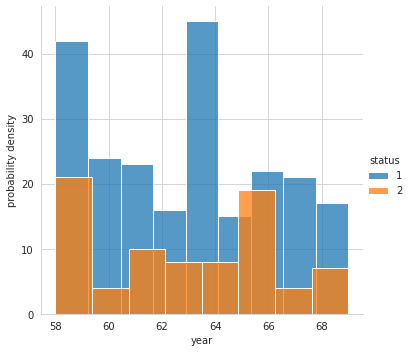

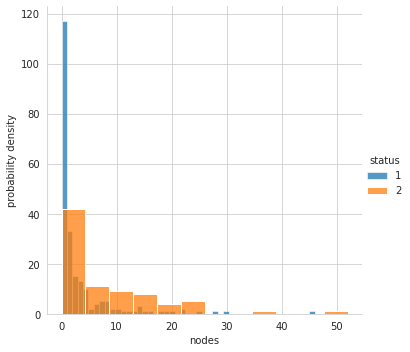

In [15]:
# PDFs(Probability Density Functions)

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.histplot,"age").add_legend()
plt.title("Univariate Histograms representing Probability Density",size=20,y=1,x=0.7)
plt.ylabel("probability density")

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.histplot,"year").add_legend()
plt.ylabel("probability density")

sns.set_style("whitegrid")
sns.FacetGrid(hab, hue = "status", height = 5).map(sns.histplot,"nodes").add_legend()
plt.ylabel("probability density")

plt.show()`

**Normally,uniformly and exponentially distributed data respectively**

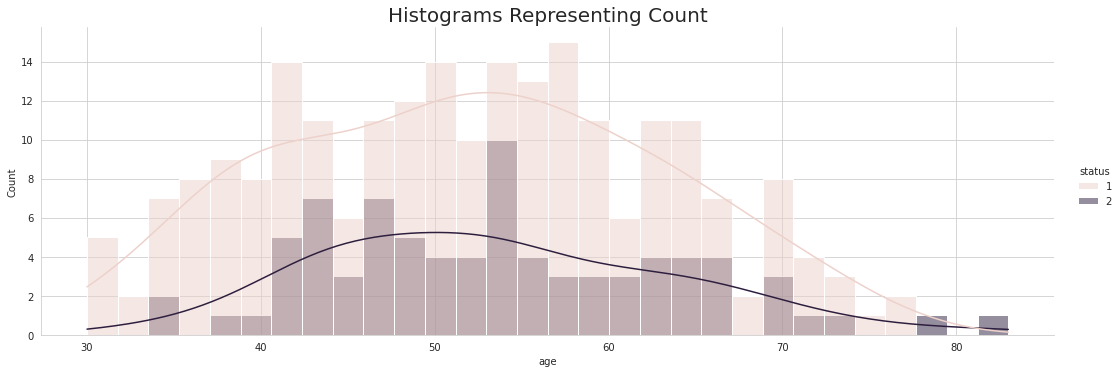

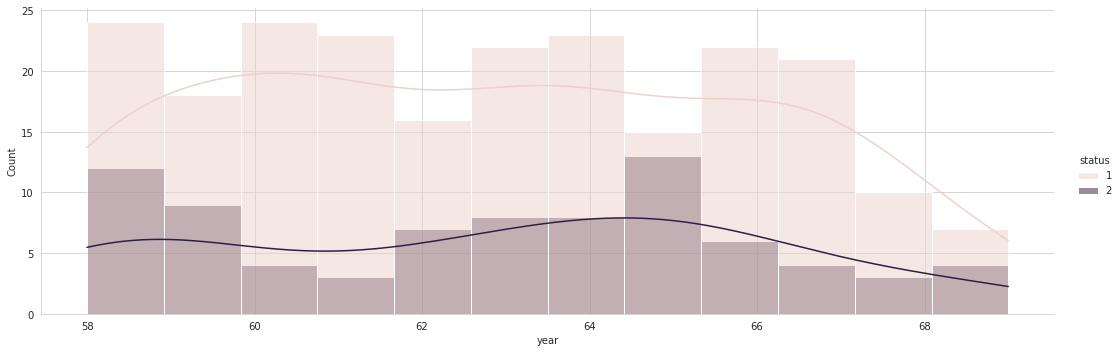

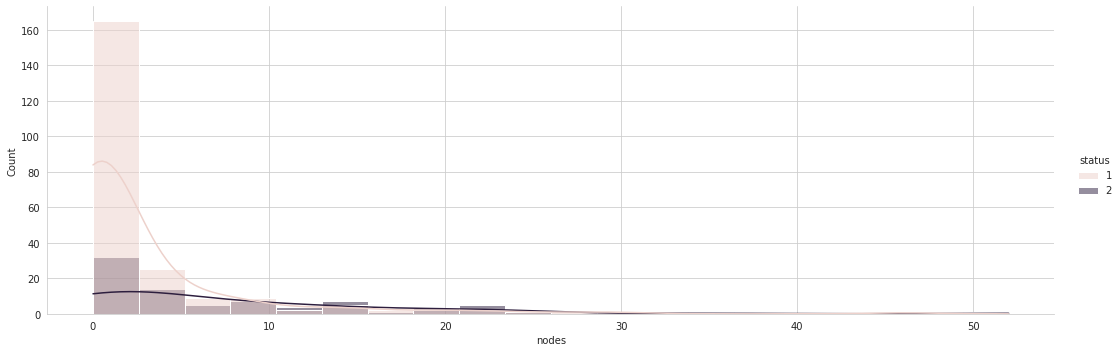

In [12]:
# Actual Count plot
sns.displot(data=hab,x='age',hue='status',kde=True,bins=30,aspect=3)
plt.title("Histograms Representing Count",size=20)
sns.displot(data=hab,x='year',hue='status',kde=True,bins=12,aspect=3)
sns.displot(data=hab,x='nodes',hue='status',kde=True,bins=20,aspect=3)
plt.show()

In [13]:
# Function which returns Chances of survival against given Feature
def Chances_estimation(feature,bins=15):
    counts,bin_edges = np.histogram(hab[feature],bins=bins)
    sur_chance=[]
    left=bin_edges[0]
    for right in bin_edges[1:]:
        # c contains the count of survivals and non survivals with the bin
        c = hab[(hab[feature]>=left)&(hab[feature]<=right)]['status'].value_counts()

        try:
            c1 = c[1]   #c1 = count of survivals
        except:
            c1 = 0
        try:
            c2 = c[2]   # c2 = count of non-survivals
        except:
            c2 = 0
        if (c1!=0) | (c2!=0):
            sur_chance.append(c1/(c1+c2))  #probability of survival = c1/(c1+c2)
        else:
            sur_chance.append(sur_chance[-1])

        left = right
        
    return sur_chance,bin_edges[1:]

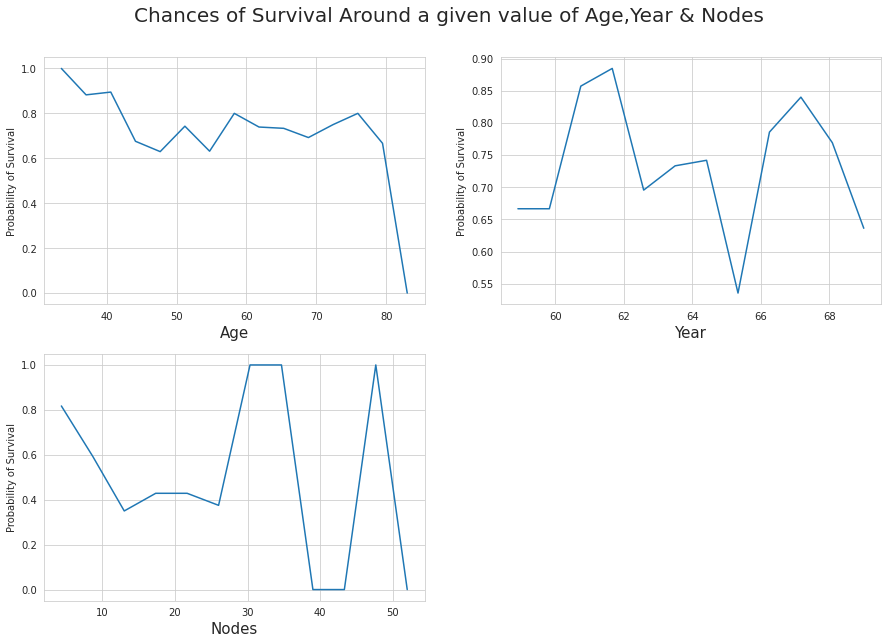

In [14]:
#plotting chances of survival against different features

plt.figure(figsize=(15,10))
plt.subplot(221)
sur_chance,bin_edges = Chances_estimation(feature='age',bins=15)
plt.plot(bin_edges,sur_chance)
plt.xlabel("Age",size=15)
plt.ylabel("Probability of Survival")


plt.subplot(222)
sur_chance,bin_edges = Chances_estimation(feature='year',bins=12)
plt.plot(bin_edges,sur_chance)
plt.xlabel("Year",size=15)
plt.ylabel("Probability of Survival")

plt.subplot(223)
sur_chance,bin_edges = Chances_estimation(feature='nodes',bins=12)
plt.plot(bin_edges,sur_chance)
plt.xlabel("Nodes",size=15)
plt.ylabel("Probability of Survival")

plt.suptitle("Chances of Survival Around a given value of Age,Year & Nodes",y=0.95,size=20)
plt.show()

**Oservations:<br>
1.Patients with age less than 40 have high chances to survive 5 years or longer, whereas patients with age above 80 have neglible chance to survive.<br>
2.we can see a fall in chances of survival in year 1965.<br>
3.As the axillary nodes increases, the chances of survival decreases (significance of nodes decreases after 15).**

### CDF

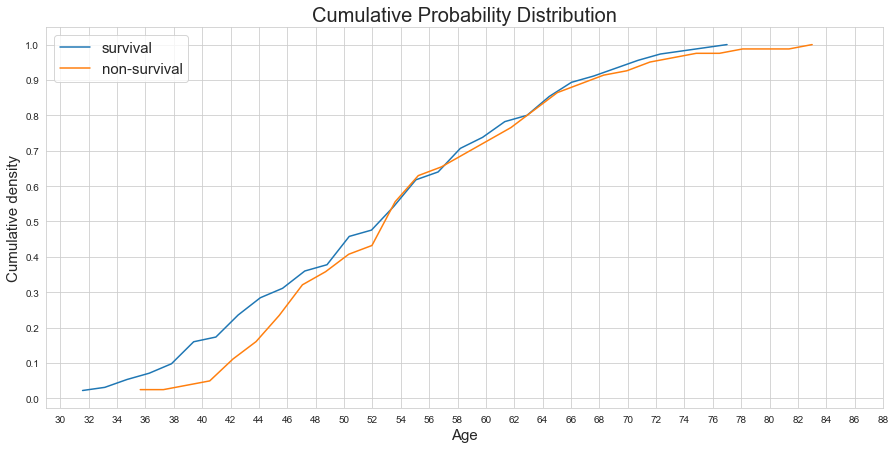

In [96]:
# AGE feature
# Survivals
plt.figure(figsize=(15,7))
counts, bin_edges = np.histogram(hab[hab['status']==1]['age'], bins=30, density = True)
pdd = counts/(sum(counts))   #Probability density distribution
cdd = np.cumsum(pdd)         #Cumulative density distribution
plt.plot(bin_edges[1:], cdd, label='survival')

# Non-survivals
counts, bin_edges = np.histogram(hab[hab['status']==2]['age'], bins=30, density = True)
pdd = counts/(sum(counts))   #Probability density distribution
cdd = np.cumsum(pdd)         #Cumulative density distribution
plt.plot(bin_edges[1:], cdd, label='non-survival')

plt.xlabel("Age",size=15)
plt.ylabel("Cumulative density",size=15)
plt.xticks(np.arange(30,90,2))
plt.yticks(np.arange(0,1.1,.1))
plt.legend(fontsize=15)
plt.title("Cumulative Probability Distribution",size=20)
plt.show()

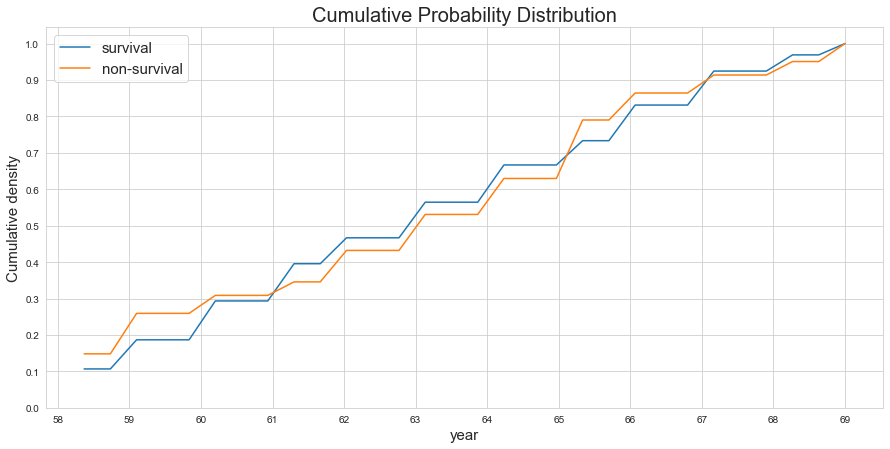

In [97]:
# YEAR feature
# Survivals
plt.figure(figsize=(15,7))
counts, bin_edges = np.histogram(hab[hab['status']==1]['year'], bins=30, density = True)
pdd = counts/(sum(counts))   #Probability density distribution
cdd = np.cumsum(pdd)         #Cumulative density distribution
plt.plot(bin_edges[1:], cdd, label='survival')

# Non-survivals
counts, bin_edges = np.histogram(hab[hab['status']==2]['year'], bins=30, density = True)
pdd = counts/(sum(counts))   #Probability density distribution
cdd = np.cumsum(pdd)         #Cumulative density distribution
plt.plot(bin_edges[1:], cdd, label='non-survival')

plt.xlabel("year",size=15)
plt.ylabel("Cumulative density",size=15)
plt.xticks(np.arange(58,70,1))
plt.yticks(np.arange(0,1.1,.1))
plt.legend(fontsize=15)
plt.title("Cumulative Probability Distribution",size=20)
plt.show()

## Cumulative Probability of survival below a given value of a feature

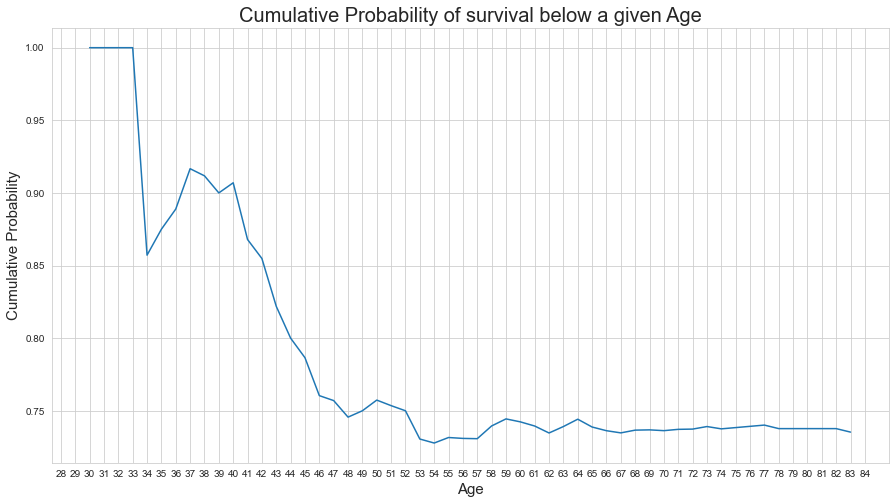

In [18]:
# probability of survival of patients below Age=x
# take- below 37, all patients have 100% chances of survival
# min age is 30 and max is 83

age_list = np.arange(30,84)
sur_prob = []
for x in age_list:
    count = hab[hab['age'] <= x]['status'].value_counts()
    try:
        c1 = count[1]   #c1 = count of survivals
    except:
        c1 = 0
    try:
        c2 = count[2]   # c2 = count of non-survivals
    except:
            c2 = 0
        
    sur_prob.append(c1/(c1+c2))

plt.figure(figsize=(15,8))
plt.plot(age_list,sur_prob)
plt.title("Cumulative Probability of survival below a given Age",size=20)
plt.xlabel("Age",size=15)
plt.ylabel("Cumulative Probability",size=15)
plt.xticks(np.arange(28,85))
plt.show()

**Cumulative Probability of survival below given age decrease till age=47, after which it almost become constant with probability around 0.74** 

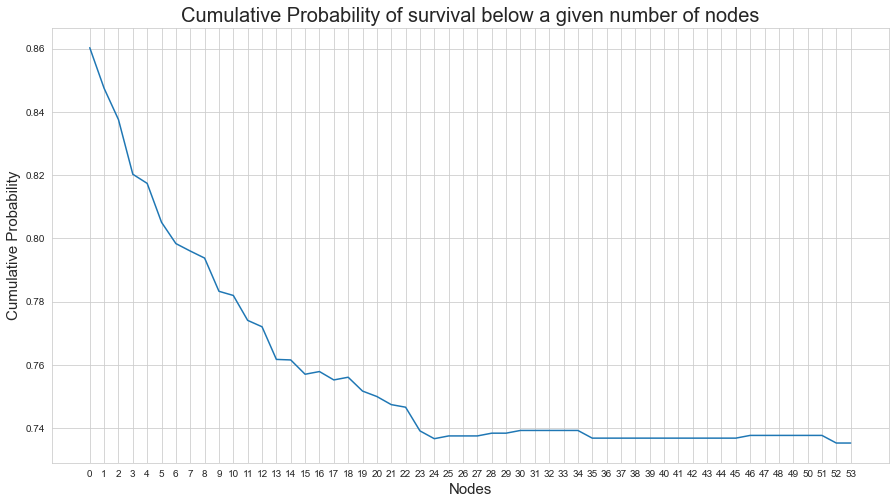

In [19]:
# probability of survival of patients below nodes=x

node_list = np.arange(0,54)
sur_prob = []
for x in node_list:
    count = hab[hab['nodes'] <= x]['status'].value_counts()
    try:
        c1 = count[1]   #c1 = count of survivals
    except:
        c1 = 0
    try:
        c2 = count[2]   # c2 = count of non-survivals
    except:
            c2 = 0
        
    sur_prob.append(c1/(c1+c2))

plt.figure(figsize=(15,8))
plt.plot(node_list,sur_prob)
plt.title("Cumulative Probability of survival below a given number of nodes",size=20)
plt.xlabel("Nodes",size=15)
plt.ylabel("Cumulative Probability",size=15)
plt.xticks(np.arange(0,54))
plt.show()

**Cumulative Probability of survival below a given number of nodes decreases exponentially, Probability of survival of patients with 0 node is highest with value 0.86**  

### Multivariate plots

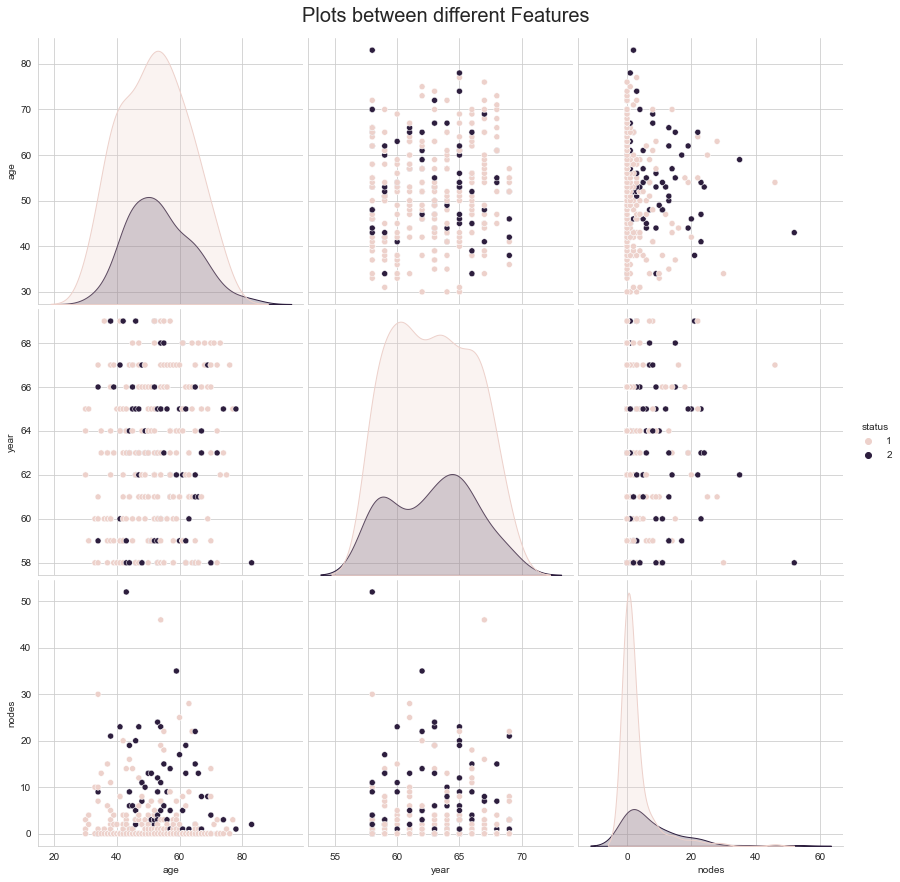

In [102]:
# pairplot
sns.set_style("whitegrid")
sns.pairplot(hab, hue = 'status', height = 4)#.add_legend(prop={'size':15})
plt.suptitle("Plots between different Features",y=1.02,size=20)
plt.show()

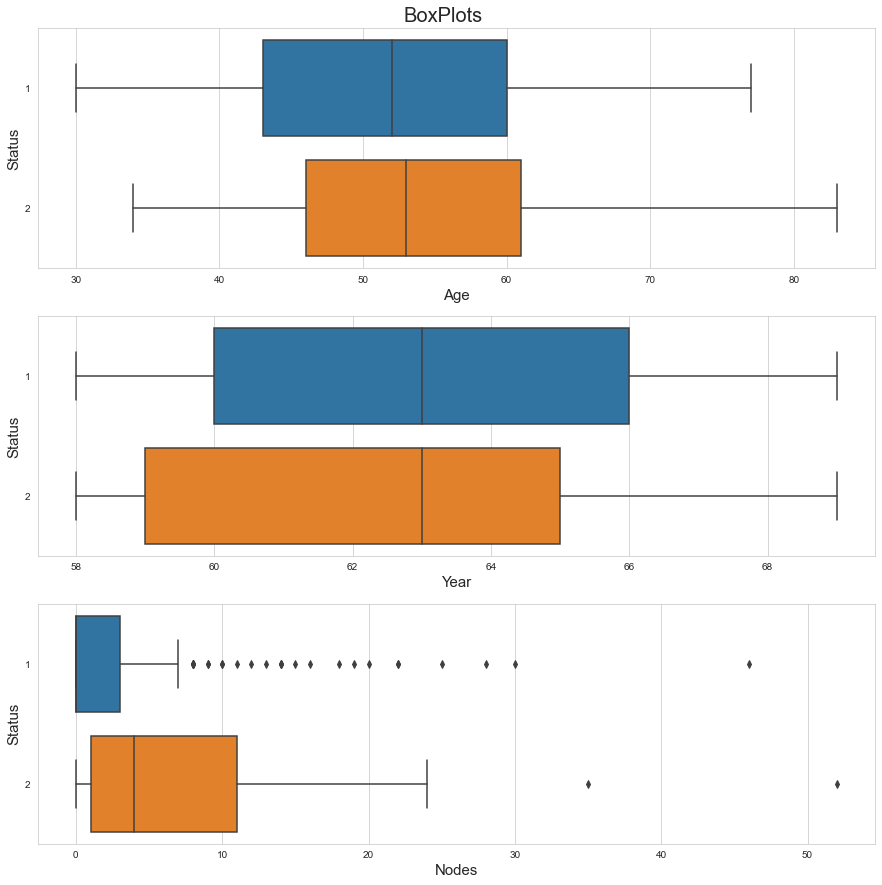

In [86]:
# boxplots
plt.figure(figsize=(15,15))
plt.subplot(311)
sns.boxplot(data = hab, x = 'age', y = 'status', orient = 'h')
plt.xlabel("Age",size=15)
plt.ylabel("Status",size=15)

plt.subplot(312)
sns.boxplot(data = hab, x = 'year', y = 'status', orient = 'h')
plt.xlabel("Year",size=15)
plt.ylabel("Status",size=15)

plt.subplot(313)
sns.boxplot(data = hab, x = 'nodes', y = 'status', orient = 'h')
plt.xlabel("Nodes",size=15)
plt.ylabel("Status",size=15)
plt.suptitle("BoxPlots",y=0.9,size=20)
plt.show()

**AGE: IQR(interquartile range) is small and the length of whiskers are comparabaly large, which means the data is concentrated around the center<br>
YEAR: IQR is comparable to whiskers' length, which means data is almost uniformly distributed.<br>
NODES: most of the data for survival patients is concentrated around 0 and of non-survivals is concentrated around 4**

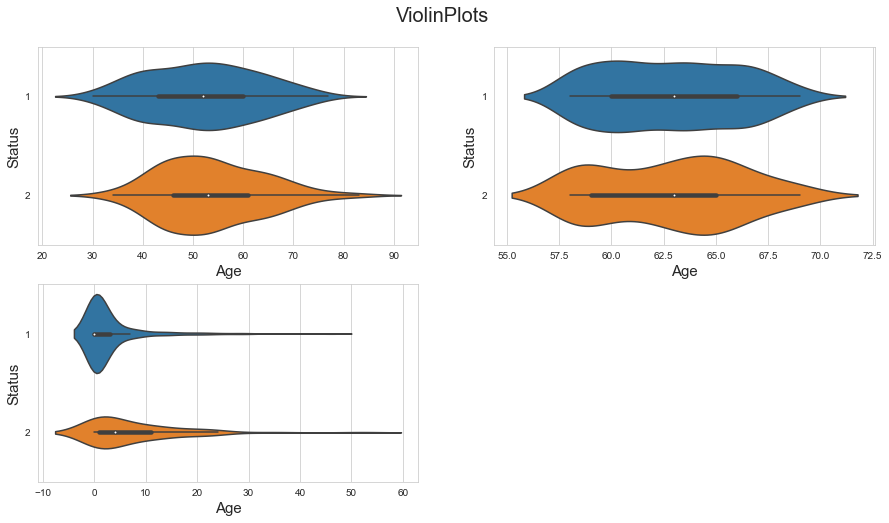

In [103]:
#violin plots
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.violinplot(data = hab, x = 'age', y = 'status', orient = 'h')
plt.xlabel("Age",size=15)
plt.ylabel("Status",size=15)

plt.subplot(222)
sns.violinplot(data = hab, x = 'year', y = 'status', orient = 'h')
plt.xlabel("Age",size=15)
plt.ylabel("Status",size=15)

plt.subplot(223)
sns.violinplot(data = hab, x = 'nodes', y = 'status', orient = 'h')
plt.xlabel("Age",size=15)
plt.ylabel("Status",size=15)
plt.suptitle("ViolinPlots",y=0.95,size=20)
plt.show()

## Mean & standard deviation

In [106]:
# Age 
print("\t\t\t Mean  \t\t\t std deviation")
print("AGE")
print("survival patients: \t",hab[hab['status']==1]['age'].mean(),"\t",hab[hab['status']==1]['age'].std())
print("non-survival patients: \t",hab[hab['status']==2]['age'].mean(),"\t",hab[hab['status']==2]['age'].std(),"\n")

# Year
print("YEAR")
print("survival patients: \t",hab[hab['status']==1]['year'].mean(),"\t",hab[hab['status']==1]['year'].std())
print("non-survival patients: \t",hab[hab['status']==2]['year'].mean(),"\t",hab[hab['status']==2]['year'].std(),"\n")

# Nodes
print("NODES")
print("survival patients: \t",hab[hab['status']==1]['nodes'].mean(),"\t",hab[hab['status']==1]['nodes'].std())
print("non-survival patients: \t",hab[hab['status']==2]['nodes'].mean(),"\t",hab[hab['status']==2]['nodes'].std())


			 Mean  			 std deviation
AGE
survival patients: 	 52.01777777777778 	 11.012154179929542
non-survival patients: 	 53.67901234567901 	 10.167137208297412 

YEAR
survival patients: 	 62.86222222222222 	 3.2229152237814973
non-survival patients: 	 62.82716049382716 	 3.34211805393223 

NODES
survival patients: 	 2.7911111111111113 	 5.870318127719734
non-survival patients: 	 7.45679012345679 	 9.185653736555784


## Conclusion:
1.We have total 306 data entries, 225 is related to survival patients and 81 to non-survival patients (unbalanced dataset)<br><br>
2.There are three features(independent variables): Age, Year and Nodes<br>
AGE:   range=(30 to 83), Normally distributed data, mean & median coincides at 52.<br>
YEAR:  range=(1958 to 1969), Uniformly distributed till 1967, mean & median are almost equal at 1963.<br>
NODES: range=(0 to 53), exponentially decreasing data, 75% of patients have 4 or less nodes and 25% have 0 node, mean = 2.8 & median = 2.<br><br>
3.Target(dependent) variable: Status: 1 denoted the survival within 5 or more years and 2 denotes non-survival cases.<br><br>
4.(a) Patients with age less than 40 have high chances of survival, whereas patients with age above 80 have neglible chance to survive.<br>
(b) Cumulative Probability of survival below given age decrease till age=47, after which it almost become constant with probability around 0.74<br>
(c) we can see a fall in chances of survival in year 1965.<br>
(d) As the axillary nodes increases, the chances of survival decreases (number of nodes greater than 15 are insignificant)<br>
(e) Cumulative Probability of survival below a given number of nodes decreases exponentially, Probability of survival of patients with 0 node is highest with value 0.86<br><br>
5. Priority of features:$\;\;\;\;$ 1.Nodes $\;\;\;\;$ 2.Age $\;\;\;\;$ 3.Year(year have almost negligible significance in classifying Status)